In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bikes = pd.read_csv('bikeshare2.csv', index_col = 'datetime', parse_dates = True)
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
bikes.rename(columns = {'count' : 'total_rentals'}, inplace = True)

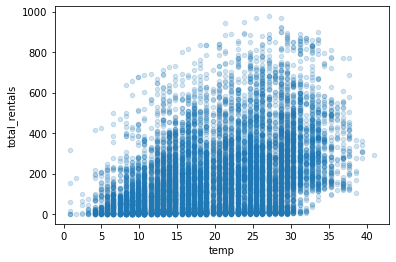

In [4]:
bikes.plot(kind = 'scatter', x= 'temp', y= 'total_rentals', alpha= 0.2)

In [5]:
X = bikes['temp']
y = bikes['total_rentals']

In [6]:
X

datetime
2011-01-01 00:00:00     9.84
2011-01-01 01:00:00     9.02
2011-01-01 02:00:00     9.02
2011-01-01 03:00:00     9.84
2011-01-01 04:00:00     9.84
                       ...  
2012-12-19 19:00:00    15.58
2012-12-19 20:00:00    14.76
2012-12-19 21:00:00    13.94
2012-12-19 22:00:00    13.94
2012-12-19 23:00:00    13.12
Name: temp, Length: 10886, dtype: float64

In [7]:
y

datetime
2011-01-01 00:00:00     16
2011-01-01 01:00:00     40
2011-01-01 02:00:00     32
2011-01-01 03:00:00     13
2011-01-01 04:00:00      1
                      ... 
2012-12-19 19:00:00    336
2012-12-19 20:00:00    241
2012-12-19 21:00:00    168
2012-12-19 22:00:00    129
2012-12-19 23:00:00     88
Name: total_rentals, Length: 10886, dtype: int64

In [8]:
X.shape

(10886,)

In [9]:
y.shape

(10886,)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

In [12]:
lr

LinearRegression()

In [13]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [14]:
lr.fit(X, y)

LinearRegression()

In [15]:
lr.predict(np.array([0]).reshape(1,-1))

array([[6.04621296]])

In [16]:
X_new = [[0], [10]]
lr.predict(X_new)

array([[ 6.04621296],
       [97.75161777]])

In [17]:
#feature engineering
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rentals,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


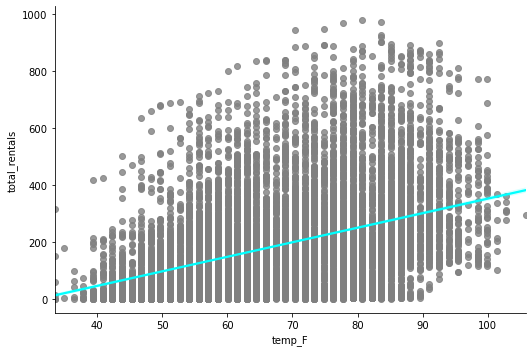

In [18]:
sns.lmplot(x = 'temp_F', y = 'total_rentals', data = bikes, aspect = 1.5, scatter_kws = {"marker": "o", "color": "grey"}, line_kws={'color': 'cyan'})

In [19]:
print(lr.intercept_)
print(lr.coef_)

[6.04621296]
[[9.17054048]]


In [20]:
# predict bike rentals at 25 degrees celcius 
lr.intercept_ + lr.coef_ * 25

array([[235.309725]])

In [21]:
lr.predict([[25]])

array([[235.309725]])

In [22]:
feature_cols = ['temp', 'season', 'weather', 'humidity']

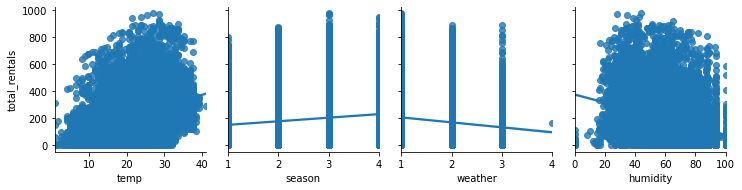

In [23]:
sns.pairplot(bikes, x_vars = feature_cols, y_vars = 'total_rentals', kind ='reg' )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022ECC32FAF0>,
      dtype=object)

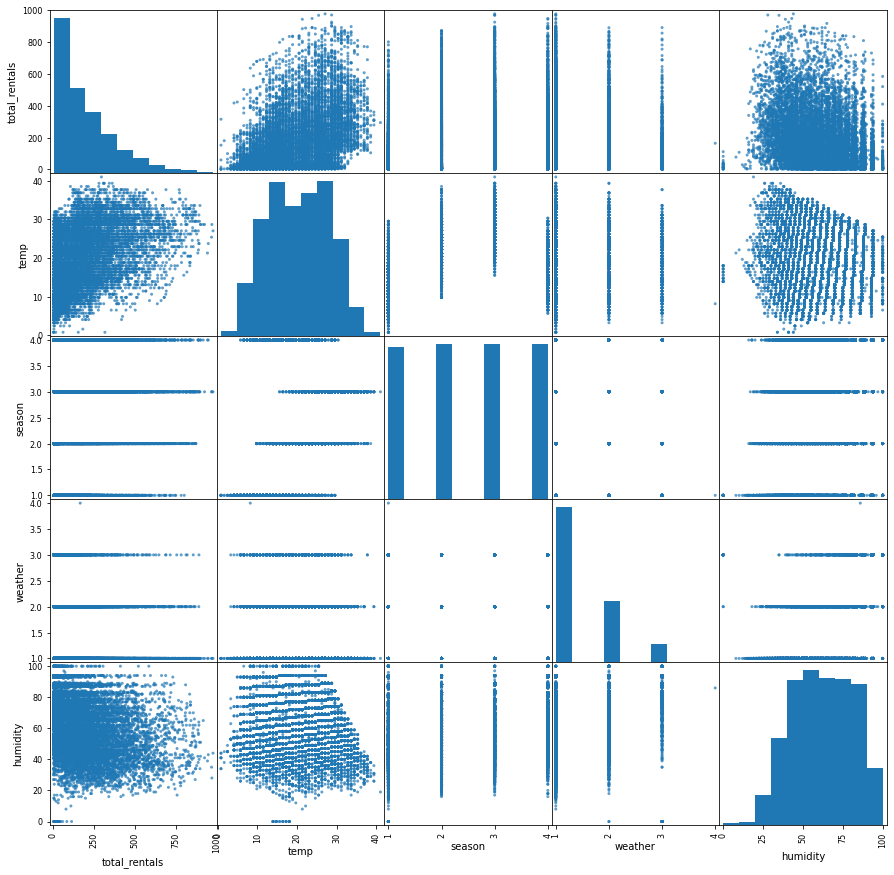

In [24]:
pd.plotting.scatter_matrix(bikes[['total_rentals'] + feature_cols], figsize = (15, 15), alpha = 0.7)

In [25]:
X = bikes[feature_cols]
y = bikes.total_rentals

In [26]:
lr2 = LinearRegression()
lr2.fit(X, y)

LinearRegression()

In [27]:
print(lr2.intercept_)
print(lr2.coef_)

159.52068786129772
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


In [28]:
bikes.groupby('weather').count()

,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,total_rentals,temp_F
weather,,,,,,,,,,,
1,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192,7192
2,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834,2834
3,859,859,859,859,859,859,859,859,859,859,859
4,1,1,1,1,1,1,1,1,1,1,1


In [29]:
season_dummies = pd.get_dummies(bikes.season, prefix = 'season')

In [30]:
season_dummies.sample(n = 5, random_state = 1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1
